In [1]:
import requests
%load_ext cudf.pandas
import pandas as pd
import zipfile
import urllib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from pathlib import Path
%load_ext autoreload
%autoreload

In [2]:
date_range = pd.date_range(start='2023-01-01', end='2023-01-01')

csv_paths = [Path(f'data/AIS_{date.strftime("%Y_%m_%d")}.csv') for date in date_range]

daily_ais_dfs = [pd.read_csv(csv_path) for csv_path in csv_paths]

df = pd.concat(daily_ais_dfs)

In [3]:
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'])


In [4]:
df = df.sort_values(by='BaseDateTime').reset_index(drop=True)
df = df.sort_values(by='MMSI').reset_index(drop=True)


In [13]:
vessel_groups = {}
vessel_groups["Cargo"] = np.concatenate([np.arange(70, 80), [1003, 1004, 1016]])
vessel_groups["Fishing"] = np.array([30, 1001, 1002])
vessel_groups["Military"] = np.array([35])
vessel_groups["Not Available"] = np.array([0])
vessel_groups["Other"] = np.concatenate([np.arange(1, 21), np.arange(23, 30), np.arange(33, 35), np.arange(38, 52), np.arange(53, 60), np.arange(90, 1000), np.arange(1005, 1012), [1018, 1020, 1022]])
vessel_groups["Passenger"] = np.concatenate([np.arange(60, 70), np.arange(1012, 1016)])
vessel_groups["Pleasure Craft"] = np.array([36, 37, 1019])
vessel_groups["Tanker"] = np.concatenate([np.arange(80, 90), [1017, 1024]])
vessel_groups["Tug Tow"] = np.array([21, 22, 31, 32, 52, 1023, 1025])

map_to_vessel_group = dict()





    
df['vessel_group'] = df['VesselType'].apply(lambda x : 'Other' if pd.isna(x) else  map_to_vessel_group[int(x)])

df['vessel_group_id'] = df['vessel_group'].apply(lambda s : vessel_group_to_id[s])

In [39]:
len(vessel_group_to_id)

9

In [ ]:
times = np.zeros((9, 86400))
last_mmsi = 0
last_time = 0
for index, row in df.iterrows():
    if index == 0:
        last_mmsi = row['MMSI']
        last_time = row['BaseDateTime']
    else:
        mmsi = row['MMSI']
        time = row['BaseDateTime']
        vg = row['vessel_group_id']
        if mmsi == last_mmsi:
            delta = (time - last_time).seconds
            times[vg, delta] += 1
            last_mmsi =mmsi
            last_time = time
        else:
            last_mmsi = mmsi
            last_time = time
    if index % 1000==0:
        print(index)      

    # if i %1000:
    #     print(i)
    
    # row = df.iloc[i]
    # vg = row['vessel_group_id']
    # times[vg, ] +

In [17]:
df.shape

(8156509, 19)

In [20]:
date = date_range[0]
df_ = df[['MMSI', 'BaseDateTime', 'vessel_group_id']]
df_.to_csv(f'sorted_data/AIS_{date.strftime("%Y_%m_%d")}.csv')

In [40]:
time = df.iloc[0]['BaseDateTime']
time = time.hour * 3600 + time.minute * 60 + time.second

In [5]:
a=df.iloc[0]['BaseDateTime'] - df.iloc[1]['BaseDateTime']

In [10]:
b = -a
b.seconds

359

In [7]:
df.iloc[:100]

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,1,2023-01-01 00:01:36,49.12525,-123.08501,0.0,267.1,105.0,A,IMO0999999,A,60.0,5.0,88.0,18.0,4.0,60.0,A
1,1,2023-01-01 00:07:35,49.12526,-123.08501,0.0,75.7,105.0,A,IMO0999999,A,60.0,5.0,88.0,18.0,4.0,60.0,A
2,1,2023-01-01 00:10:35,49.12525,-123.08501,0.0,290.5,105.0,A,IMO0999999,A,60.0,5.0,88.0,18.0,4.0,60.0,A
3,1,2023-01-01 00:25:36,49.12525,-123.08501,0.0,264.1,105.0,A,IMO0999999,A,60.0,5.0,88.0,18.0,4.0,60.0,A
4,1,2023-01-01 00:28:36,49.12525,-123.08501,0.0,290.0,105.0,A,IMO0999999,A,60.0,5.0,88.0,18.0,4.0,60.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2023-01-01 08:19:36,49.12526,-123.08501,0.0,217.1,105.0,A,IMO0999999,A,60.0,5.0,88.0,18.0,4.0,60.0,A
96,1,2023-01-01 08:28:36,49.12526,-123.08501,0.0,289.9,105.0,A,IMO0999999,A,60.0,5.0,88.0,18.0,4.0,60.0,A
97,1,2023-01-01 08:31:35,49.12525,-123.08501,0.0,95.3,105.0,A,IMO0999999,A,60.0,5.0,88.0,18.0,4.0,60.0,A
98,1,2023-01-01 08:34:35,49.12525,-123.08501,0.0,171.4,105.0,A,IMO0999999,A,60.0,5.0,88.0,18.0,4.0,60.0,A


In [18]:
df_ = df[['MMSI', 'VesselType', 'BaseDateTime']]

vesseltype = df_['VesselType']
times = df_['BaseDateTime']
mmsi = df_['MMSI']


In [46]:
date_ranges = pd.date_range(start='2023-01-01', end='2023-12-31')
date_ranges[0].month

1

### Timestep Distribution

In [39]:
df['BaseDateTime'].dt.day

0          1
1          1
2          1
3          1
4          1
          ..
8156504    1
8156505    1
8156506    1
8156507    1
8156508    1
Name: BaseDateTime, Length: 8156509, dtype: int16

In [36]:
vessel_groups = {}
vessel_groups["Cargo"] = np.concatenate([np.arange(70, 80), [1003, 1004, 1016]])
vessel_groups["Fishing"] = np.array([30, 1001, 1002])
vessel_groups["Military"] = np.array([35])
vessel_groups["Not Available"] = np.array([0])
vessel_groups["Other"] = np.concatenate([np.arange(1, 21), np.arange(23, 30), np.arange(33, 35), np.arange(38, 52), np.arange(53, 60), np.arange(90, 1000), np.arange(1005, 1012), [1018, 1020, 1022]])
vessel_groups["Passenger"] = np.concatenate([np.arange(60, 70), np.arange(1012, 1016)])
vessel_groups["Pleasure Craft"] = np.array([36, 37, 1019])
vessel_groups["Tanker"] = np.concatenate([np.arange(80, 90), [1017, 1024]])
vessel_groups["Tug Tow"] = np.array([21, 22, 31, 32, 52, 1023, 1025])

map_to_vessel_group = dict()
for vg in vessel_groups:
    for i in vessel_groups[vg]:
        map_to_vessel_group[int(i)] = vg

df['vessel_group'] = df['VesselType'].apply(lambda x : 'Other' if pd.isna(x) else (map_to_vessel_group[int(x)]))


df_ = pd.DataFrame()
dfg = df.groupby(['hour', 'vessel_group'])
n_vessels = dfg['MMSI'].nunique()
n_messages = df['MMSI'].count()
# pivod_df = 
# df_['n_vessels'] = dfg['MMSI'].nunique()
# # df_['n_messages'] = dfg['MMSI'].count()

In [37]:
# pivot_df = n_vessels.pivot_table(index='vessel_group', columns='vessel_group', values='c', fill_value=0)
pivot_df = n_vessels.unstack(level='vessel_group').fillna(0)
pivot_df

vessel_group,Cargo,Fishing,Military,Not Available,Other,Passenger,Pleasure Craft,Tanker,Tug Tow
hour,,,,,,,,,
0,1014,783,18,93,1396,828,5032,541,3204
1,1008,781,20,92,1376,804,4975,528,3195
2,1000,762,19,94,1390,799,4921,535,3187
3,1001,769,19,92,1381,791,4932,533,3158
4,1016,780,19,93,1374,768,4913,542,3173
5,1014,790,18,93,1370,760,4912,538,3170
6,1005,784,19,93,1347,739,4918,523,3142
7,1030,787,19,91,1335,707,4950,535,3142
8,1010,792,19,88,1316,682,4924,536,3135


In [101]:
unique_MMSIs = df['MMSI'].unique()
dt = [] # Store the time deltas

# Iterate through uids (MMSI) to compute time deltas
# for MMSI in unique_MMSIs:
#     MMSI_df = df[df['MMSI'] == MMSI]
df.sort_values(by=['BaseDateTime'], inplace=True)
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'])
df['TimeDelta'] = df.groupby('MMSI')['BaseDateTime'].diff()

In [102]:
df.tail()
df[df['MMSI']==367357320]

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,TimeDelta
7579,367357320,2023-01-01 00:00:09,30.80223,-81.51778,0.0,360.0,511.0,C-TRACTOR 3,IMO8835164,WBX3589,70.0,0.0,29.0,11.0,3.3,31.0,A,NaT
10048,367357320,2023-01-01 00:01:20,30.80223,-81.51778,0.0,360.0,511.0,C-TRACTOR 3,IMO8835164,WBX3589,70.0,0.0,29.0,11.0,3.3,31.0,A,0 days 00:01:11
16641,367357320,2023-01-01 00:02:28,30.80222,-81.51778,0.0,360.0,511.0,C-TRACTOR 3,IMO8835164,WBX3589,70.0,0.0,29.0,11.0,3.3,31.0,A,0 days 00:01:08
25369,367357320,2023-01-01 00:03:39,30.80221,-81.51778,0.0,360.0,511.0,C-TRACTOR 3,IMO8835164,WBX3589,70.0,0.0,29.0,11.0,3.3,31.0,A,0 days 00:01:11
64153,367357320,2023-01-01 00:04:59,30.80221,-81.51778,0.0,360.0,511.0,C-TRACTOR 3,IMO8835164,WBX3589,70.0,0.0,29.0,11.0,3.3,31.0,A,0 days 00:01:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8144212,367357320,2023-01-01 23:55:19,30.80221,-81.51777,0.0,360.0,511.0,C-TRACTOR 3,IMO8835164,WBX3589,70.0,0.0,29.0,11.0,3.3,31.0,A,0 days 00:01:10
7418498,367357320,2023-01-01 23:56:28,30.80222,-81.51777,0.0,360.0,511.0,C-TRACTOR 3,IMO8835164,WBX3589,70.0,0.0,29.0,11.0,3.3,31.0,A,0 days 00:01:09
7418470,367357320,2023-01-01 23:57:40,30.80222,-81.51779,0.0,360.0,511.0,C-TRACTOR 3,IMO8835164,WBX3589,70.0,0.0,29.0,11.0,3.3,31.0,A,0 days 00:01:12
8146923,367357320,2023-01-01 23:58:50,30.80222,-81.51780,0.0,360.0,511.0,C-TRACTOR 3,IMO8835164,WBX3589,70.0,0.0,29.0,11.0,3.3,31.0,A,0 days 00:01:10


In [103]:
df['TimeDelta'].dt.total_seconds().max()

np.float64(85041.0)

(1, 2000)

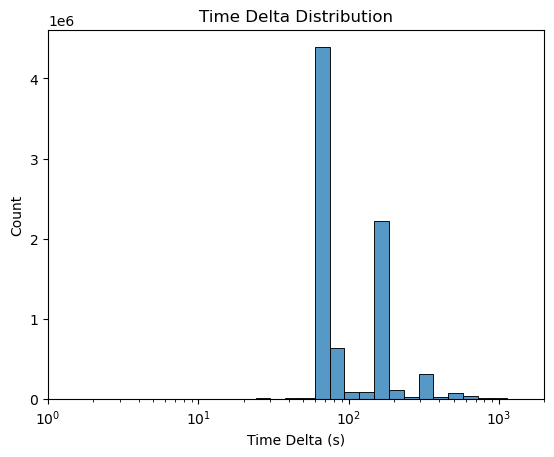

In [104]:
ax = sns.histplot(df['TimeDelta'].dt.total_seconds(), bins=50, log_scale=True)
ax.set(xlabel='Time Delta (s)', ylabel='Count', title='Time Delta Distribution')
ax.set_xlim(1, 2000)

### Positional Heatmaps based on Vessel Type

In [29]:

# sns.histplot(data=df, x='LON', y='LAT', cmap='viridis')
# plt.title('LAT vs LON Heatmap')
# plt.show()

df['VesselType'].unique()


### Heading Values over 360?

In [30]:
unique_headings = df['Heading'].unique()
unique_headings.sort()
print(unique_headings)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [68]:
# print(type(np.arange(0,5)))
single_array = np.concatenate([np.arange(0,5), [101]])
print(single_array)
print(single_array.shape)

[  0   1   2   3   4 101]
(6,)


### Distribution of Vessel Types

MMSI: 100%|██████████| 15932/15932 [03:04<00:00, 86.24it/s]


Text(0.5, 0, 'Count')

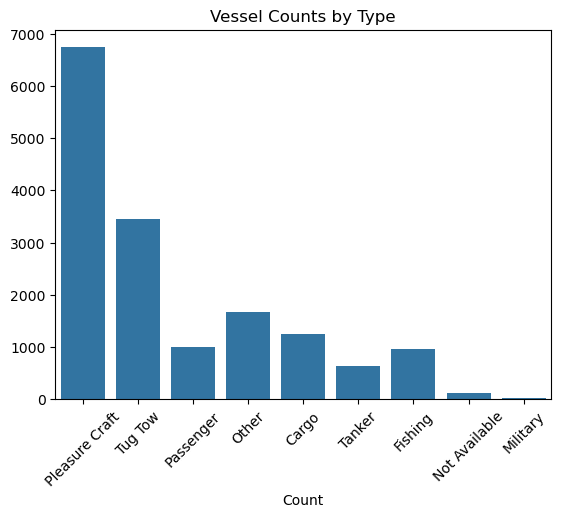

In [108]:
vessel_groups = {}
vessel_groups["Cargo"] = np.concatenate([np.arange(70, 80), [1003, 1004, 1016]])
vessel_groups["Fishing"] = np.array([30, 1001, 1002])
vessel_groups["Military"] = np.array([35])
vessel_groups["Not Available"] = np.array([0])
vessel_groups["Other"] = np.concatenate([np.arange(1, 21), np.arange(23, 30), np.arange(33, 35), np.arange(38, 52), np.arange(53, 60), np.arange(90, 1000), np.arange(1005, 1012), [1018, 1020, 1022]])
vessel_groups["Passenger"] = np.concatenate([np.arange(60, 70), np.arange(1012, 1016)])
vessel_groups["Pleasure Craft"] = np.array([36, 37, 1019])
vessel_groups["Tanker"] = np.concatenate([np.arange(80, 90), [1017, 1024]])
vessel_groups["Tug Tow"] = np.array([21, 22, 31, 32, 52, 1023, 1025])

vessel_groups_counts = {}

# Assign vessel groups to each MMSI
unique_MMSIs = df['MMSI'].unique()
for MMSI in tqdm(unique_MMSIs, desc='MMSI'):
     MMSI_df = df[df['MMSI'] == MMSI]
     vessel_type = MMSI_df.iloc[0]['VesselType']

     for vessel_group in vessel_groups:
          if vessel_type in vessel_groups[vessel_group]:
               df.loc[df['MMSI'] == MMSI,'VesselGroup'] = vessel_group # update the DataFrame with the vessel group
               if vessel_group in vessel_groups_counts:
                    vessel_groups_counts[vessel_group] += 1
               else:
                    vessel_groups_counts[vessel_group] = 1

sns.barplot(vessel_groups_counts)
plt.title("Vessel Counts by Type")
plt.xticks(rotation=45)
plt.xlabel('Count')

In [90]:
df.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,TimeDelta,VesselGroup
2351,366876420,2023-01-01,32.72374,-117.22354,0.0,18.7,511.0,AFTERGLOW,NaN,WDI5149,37.0,NaN,33.0,8.0,NaN,NaN,B,NaT,Pleasure Craft
682,366989380,2023-01-01,38.06354,-122.26807,36.2,248.4,248.0,MARE ISLAND,IMO9144665,WDC2198,60.0,0.0,43.0,12.0,1.5,60.0,A,NaT,Passenger
7346,367486370,2023-01-01,33.74594,-118.22476,0.0,218.2,8.0,NRC QUEST,IMO9271195,WDF7619,90.0,0.0,48.0,10.0,3.0,70.0,A,NaT,Other
673,368122350,2023-01-01,21.28582,-157.86644,5.6,275.4,511.0,TIGER22-,NaN,WDL3512,99.0,0.0,0.0,0.0,0.0,99.0,A,NaT,Other
3425,368045410,2023-01-01,27.84012,-97.06920,0.0,140.5,511.0,JOSEPH F WEBER,IMO1012865430,WDK3453,60.0,15.0,46.0,16.0,3.3,60.0,A,NaT,Passenger


### SOG v.s. Vessel Type

Unique Vessel Types: 66


<Axes: xlabel='SOG', ylabel='VesselGroup'>

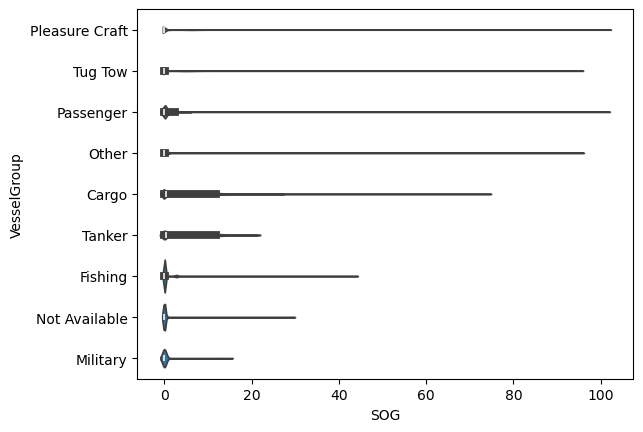

In [113]:
# Remove sentinel SOG values
# 102.3: Not available
# 102.2: 102.2 knots or higher
df_SOG = df[(df['SOG'] != 102.3) & (df['SOG'] != 102.2)]
unique_vessel_types = df_SOG['VesselType'].unique()
unique_vessel_types.sort()
print(f'Unique Vessel Types: {len(unique_vessel_types)}')

max_SOG_by_vessel_type = {}

df_SOG.tail()
sns.violinplot(data=df_SOG, x="SOG", y="VesselGroup")

# sns.boxplot(data=df_SOG, x="SOG", y="VesselGroup", whis=(0,100))
